# **Titanic - ML**

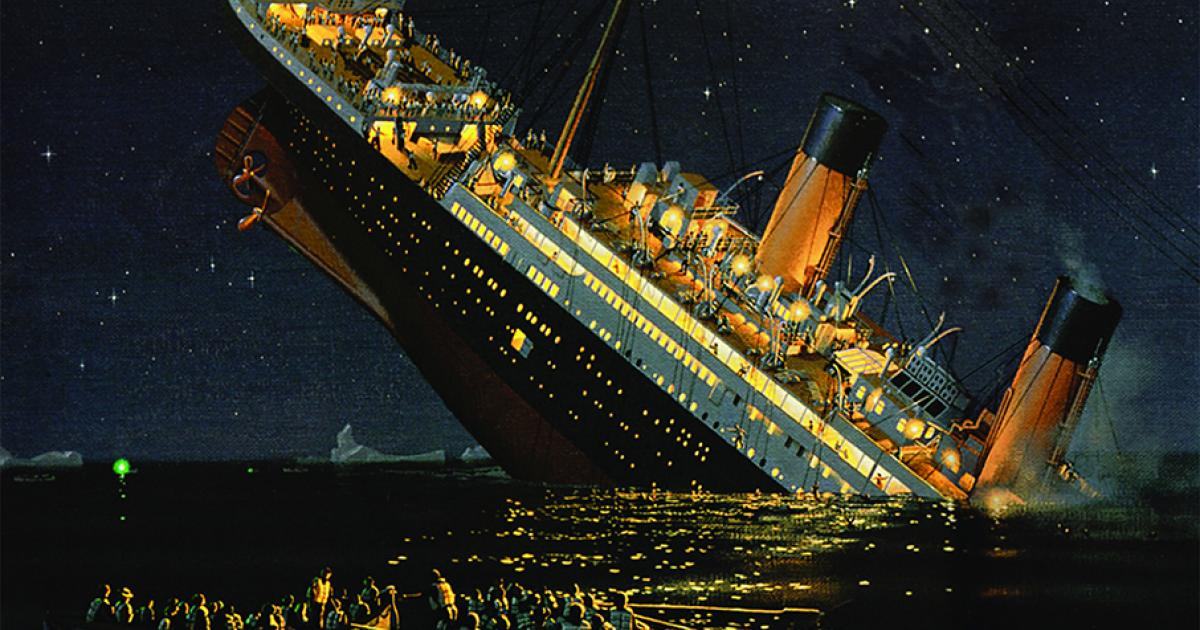

In [4]:
!unzip /content/titanic.zip

Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

## **Data Analysis & Preprocessing**

In [138]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test.csv")

In [139]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [141]:
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [142]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [143]:
df_train.drop("Name", axis = "columns", inplace = True)
df_test.drop("Name", axis = "columns", inplace = True)

In [144]:
for column in df_train.columns:
  print(f"{column} : {df_train[column].unique()}\n\n")

PassengerId : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 

In [145]:
df_train.drop(["PassengerId", "Ticket", "Cabin"], axis = "columns", inplace = True)
df_test.drop(["PassengerId", "Ticket", "Cabin"], axis = "columns", inplace = True)

In [146]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [147]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [148]:
df_train.Age.fillna(df_train.Age.mean(), inplace = True)
df_test.Age.fillna(df_test.Age.mean(), inplace = True)

In [149]:
df_train.dropna(subset = "Embarked", inplace = True)
df_test.dropna(subset = "Fare", inplace = True)

In [150]:
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [151]:
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [152]:
df_train["Male"] = df_train.Sex == "male"
df_test["Male"] = df_test.Sex == "male"

In [153]:
df_train.drop("Sex", axis = "columns", inplace = True)
df_test.drop("Sex", axis = "columns", inplace = True)

In [154]:
def create_dummies(df: pd.DataFrame, column: str) -> pd.DataFrame:
  dummies = pd.get_dummies(df[column])

  cols = []
  for col in dummies.columns:
    cols.append(f"{column}_{col}")
  dummies.columns = cols

  df = pd.concat((df, dummies), axis = "columns")
  df.drop(column, axis = "columns", inplace = True)
  return df.drop(dummies.columns[-1], axis = "columns")

In [155]:
cols = ["Embarked", "Parch", "SibSp", "Pclass"]

for col in cols:
  df_train = create_dummies(df_train, col)
  df_test = create_dummies(df_test, col)

In [156]:
df_train.head()

,Survived,Age,Fare,Male,Embarked_C,Embarked_Q,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Pclass_1,Pclass_2
0,0,22.0,7.2500,True,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,38.0,71.2833,False,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,26.0,7.9250,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,35.0,53.1000,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [157]:
from sklearn.preprocessing import MinMaxScaler

In [158]:
scaler = MinMaxScaler()

scaler.fit(df_train[["Age", "Fare"]])
df_train[["Age", "Fare"]] = scaler.transform(df_train[["Age", "Fare"]])

scaler.fit(df_test[["Age", "Fare"]])
df_test[["Age", "Fare"]] = scaler.transform(df_test[["Age", "Fare"]])

In [159]:
df_train.head()

,Survived,Age,Fare,Male,Embarked_C,Embarked_Q,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Pclass_1,Pclass_2
0,0,0.271174,0.014151,True,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,0.472229,0.139136,False,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1,0.321438,0.015469,False,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.434531,0.103644,False,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0.434531,0.015713,True,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [160]:
df_test.head()

,Age,Fare,Male,Embarked_C,Embarked_Q,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Pclass_1,Pclass_2
0,0.452723,0.015282,True,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.617566,0.013663,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0.815377,0.018909,True,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0.353818,0.016908,True,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.287881,0.023984,False,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [161]:
df_train.describe()

,Survived,Age,Fare,Embarked_C,Embarked_Q,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,Pclass_1,Pclass_2
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.367347,0.062649,0.188976,0.086614,0.760405,0.132733,0.089989,0.005624,0.004499,0.005624,0.681665,0.235096,0.031496,0.017998,0.020247,0.005624,0.240720,0.206974
std,0.486260,0.162960,0.097003,0.391710,0.281427,0.427077,0.339477,0.286327,0.074826,0.066964,0.074826,0.466093,0.424297,0.174752,0.133018,0.140925,0.074826,0.427761,0.405365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.271174,0.015412,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.367921,0.028213,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.434531,0.060508,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
corr = df_train.corr()
corr.Survived.sort_values(ascending = True)

Male         -0.541585
Parch_0      -0.149328
SibSp_0      -0.118087
Age          -0.074673
SibSp_4      -0.063830
SibSp_5      -0.059185
Parch_4      -0.052907
SibSp_3      -0.036897
Parch_5      -0.028235
Embarked_Q    0.004536
SibSp_2       0.030366
Parch_3       0.033666
Parch_2       0.076061
Pclass_2      0.095002
Parch_1       0.135556
Embarked_C    0.169966
SibSp_1       0.175030
Fare          0.255290
Pclass_1      0.282368
Survived      1.000000
Name: Survived, dtype: float64

In [164]:
x_train = df_train.drop("Survived", axis = "columns").values
y_train = df_train.Survived.values

x_test = df_test.values

## **Supervised Learning**

In [170]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [176]:
grid = {
    "Logistic Regression" : {
        "model" : LogisticRegression(),
        "parameters" : {}
    },

    "Decision Tree" : {
        "model" : DecisionTreeClassifier(),
        "parameters" : {}
    },

    "Multi - Layer Perceptron" : {
        "model" : MLPClassifier(max_iter = 1000),
        "parameters" : {
            "solver" : ["adam"],
            "activation" : ["relu", "sigmoid", "tanh", "softmax"],
            "hidden_layer_sizes" : [(100, 100, 100), (256, 128, 64)]
        }
    },

    "Random Forest" : {
        "model" : RandomForestClassifier(),
        "parameters" : {
            "n_estimators" : [25, 50, 100]
        }
    },

    "Support Vector Machine" : {
        "model" : SVC(),
        "parameters" : {
            "C" : [1, 10],
            "kernel" : ["linear", "sigmoid", "rbf"]
        }
    },

    "Gaussian Naive Bayes" : {
        "model" : GaussianNB(),
        "parameters" : {}
    },

    "K Nearest Neighbors" : {
        "model" : KNeighborsClassifier(),
        "parameters" : {
            "n_neighbors" : [5, 10, 20],
            "algorithm" : ["auto", "brute"]
        }
    }
}

In [177]:
from sklearn.model_selection import GridSearchCV

for Model in grid:
  clf = GridSearchCV(grid[Model]["model"], grid[Model]["parameters"])
  clf.fit(x_train, y_train)

  print(
      Model,
      clf.best_estimator_,
      clf.best_score_,
      clf.best_params_,
      sep = "\n"
  )

  print("\n\n")

Logistic Regression
LogisticRegression()
0.8031676506062337
{}



Decision Tree
DecisionTreeClassifier()
0.7840347870246938
{}





/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-p

Multi - Layer Perceptron
MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)
0.7885736050276138
{'activation': 'relu', 'hidden_layer_sizes': (100, 100, 100), 'solver': 'adam'}



Random Forest
RandomForestClassifier(n_estimators=50)
0.7986732685837618
{'n_estimators': 50}



Support Vector Machine
SVC(C=10)
0.8009331555894115
{'C': 10, 'kernel': 'rbf'}



Gaussian Naive Bayes
GaussianNB()
0.4139465498635181
{}



K Nearest Neighbors
KNeighborsClassifier(n_neighbors=20)
0.8009268075922046
{'algorithm': 'auto', 'n_neighbors': 20}





In [178]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

### **Model Evaluation**

In [181]:
from sklearn.model_selection import cross_val_score
kfold_scores = cross_val_score(LogisticRegression(), x_train, y_train, cv = 10)

In [182]:
kfold_scores

array([0.78651685, 0.78651685, 0.7752809 , 0.83146067, 0.80898876,
       0.78651685, 0.80898876, 0.79775281, 0.83146067, 0.80681818])

In [183]:
np.mean(kfold_scores)

0.8020301327885597

In [187]:
model.predict(np.concatenate((x_test[:, :11], x_test[:, 12:]), axis = 1))

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

## **Unsupervised Learning**

In [190]:
x = df_train[["Age", "Fare"]].values

Text(0.5, 1.0, 'Age VS Fare')

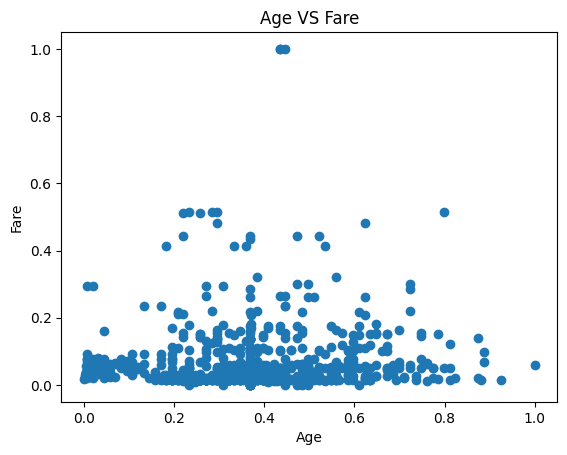

In [192]:
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Age VS Fare")

In [193]:
from sklearn.cluster import KMeans

In [195]:
sse = []

for k in range(1, 11):
  model = KMeans(n_clusters = k)
  model.fit(x)
  sse.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

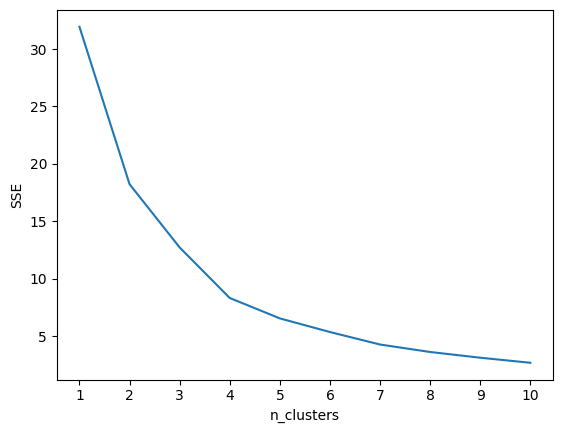

In [196]:
plt.plot(sse)
plt.xticks(labels = [i for i in range(1, 11)], ticks = [i for i in range(10)])
plt.xlabel("n_clusters")
plt.ylabel("SSE")

In [197]:
model = KMeans(n_clusters = 2)# n_clusters = 3 or 4 for better clustering(Elbow Method)
df_train["cluster"] = model.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [198]:
centers = model.cluster_centers_
centers

array([[0.30028141, 0.05153814],
       [0.59111555, 0.09971937]])

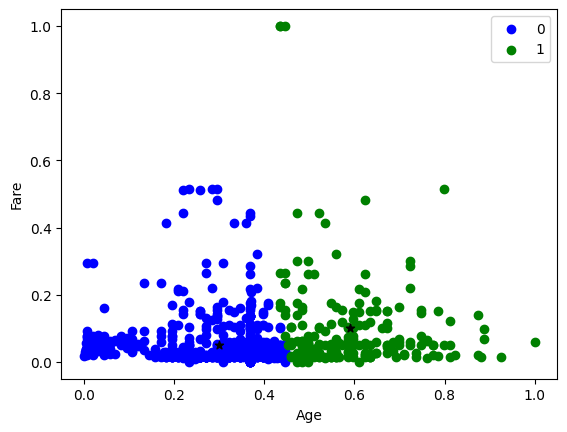

In [200]:
df_0 = df_train[df_train.cluster == 0]
df_1 = df_train[df_train.cluster == 1]

plt.scatter(df_0.Age, df_0.Fare, color = "blue", label = '0')
plt.scatter(df_1.Age, df_1.Fare, color = "green", label = '1')

# Plotting The Centers Of The Clusters
plt.scatter(centers[:, 0], centers[:, 1], color = "black", marker = '*')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()

In [201]:
model.fit_predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [203]:
model.predict(np.concatenate((x_test[:, :11], x_test[:, 12:]), axis = 1))

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,